In [1]:
import pandas as pd
from sklearn import svm
from numpy import loadtxt,ravel,transpose
from pylab import show,title,plot
from sklearn import linear_model
import csv
%matplotlib inline

In [2]:
data = pd.read_csv('student-mat.csv',delimiter=';')

In [3]:
print "Training"
data

Training


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [4]:
labels=data['G3']
labels=ravel(labels)
print labels

[ 6  6 10 15 10 15 11  6 19 15  9 12 14 11 16 14 14 10  5 10 15 15 16 12  8
  8 11 15 11 11 12 17 16 12 15  6 18 15 11 13 11 12 18 11  9  6 11 20 14  7
 13 13 10 11 13 10 15 15  9 16 11 11  9  9 10 15 12  6  8 16 15 10  5 14 11
 10 10 11 10  5 12 11  6 15 10  8  6 14 10  7  8 18  6 10 14 10 15 10 14  8
  5 17 14  6 18 11  8 18 13 16 19 10 13 19  9 16 14 13  8 13 15 15 13 13  8
 12 11  9  0 18  0  0 12 11  0  0  0  0 12 15  0  9 11 13  0 11  0 11  0 10
  0 14 10  0 12  8 13 10 15 12  0  7  0 10  7 12 10 16  0 14  0 16 10  0  9
  9 11  6  9 11  8 12 17  8 12 11 11 15  9 10 13  9  8 10 14 15 16 10 18 10
 16 10 10  6 11  9  7 13 10  7  8 13 14  8 10 15  4  8  8 10  6  0 17 13 14
  7 15 12  9 12 14 11  9 13  6 10 13 12 11  0 12 12  0 12  0 18 13  8  5 15
  8 10  8  8 12  8 13 11 14  0 18  8 12  9  0 17 10 11 10  0  9 14 11 14 10
 12  9  9  8 10  8 10 12 10 11 11 19 12 14 15 11 15 13 18 14 11  0  8 14 16
 11 10 14 18 13 12 18  8 12 10  0 13 11 11 13 11  0  9 10 11 13  9 11 15 15
 11 16 10  9

In [5]:
x = data.drop('G3',axis = 1)

In [6]:
x1 = x
x1['school'] = x1['school'].map({'GP':1,'MS':2})
x1['sex'] = x1['sex'].map({'M':1,'F':2})
x1['address'] = x1['address'].map({'U':1,'R':2})
x1['famsize'] = x1['famsize'].map({'GT3':1,'LE3':2})
x1['Pstatus'] = x1['Pstatus'].map({'A':1,'T':2})
x1['Mjob'] = x1['Mjob'].map({'at_home':1,'health':2,'services':3,'other':4,'teacher':5})
x1['Fjob'] = x1['Fjob'].map({'at_home':1,'health':2,'services':3,'other':4,'teacher':5})
x1['romantic'] = x1['romantic'].map({'yes':1,'no':2})
x1['reason'] = x1['reason'].map({'course':1,'other':2,'home':3,'reputation':4})
x1['guardian'] = x1['guardian'].map({'mother':1,'father':2,'other':3})
x1['schoolsup'] = x1['schoolsup'].map({'yes':1,'no':2})
x1['famsup'] = x1['famsup'].map({'yes':1,'no':2})
x1['paid'] = x1['paid'].map({'yes':1,'no':2})
x1['activities'] = x1['activities'].map({'yes':1,'no':2})
x1['nursery'] = x1['nursery'].map({'yes':1,'no':2})
x1['higher'] = x1['higher'].map({'yes':1,'no':2})
x1['internet'] = x1['internet'].map({'yes':1,'no':2})

In [7]:
x1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1,2,18,1,1,1,4,4,1,5,...,2,4,3,4,1,1,3,6,5,6
1,1,2,17,1,1,2,1,1,1,4,...,2,5,3,3,1,1,3,4,5,5
2,1,2,15,1,2,2,1,1,1,4,...,2,4,3,2,2,3,3,10,7,8
3,1,2,15,1,1,2,4,2,2,3,...,1,3,2,2,1,1,5,2,15,14
4,1,2,16,1,1,2,3,3,4,4,...,2,4,3,2,1,2,5,4,6,10
5,1,1,16,1,2,2,4,3,3,4,...,2,5,4,2,1,2,5,10,15,15
6,1,1,16,1,2,2,2,2,4,4,...,2,4,4,4,1,1,3,0,12,12
7,1,2,17,1,1,1,4,4,4,5,...,2,4,1,4,1,1,1,6,6,5
8,1,1,15,1,2,1,3,2,3,4,...,2,4,2,2,1,1,1,0,16,18
9,1,1,15,1,1,2,3,4,4,4,...,2,5,5,1,1,1,5,0,14,15


In [8]:
x = x1
model=linear_model.LogisticRegression()
model.fit(x,labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [9]:
print "Coefficients Learned" 
pd.DataFrame(zip(x.columns, transpose(model.coef_)))

Coefficients Learned


,0,1
0,school,"[-0.506824504506, -0.0438736500003, 0.60991777..."
1,sex,"[-0.464546344577, 0.131293981268, 0.4803339013..."
2,age,"[1.02211873752, -0.218819076715, -0.3075322088..."
3,address,"[-0.219677031515, -0.0766096652531, 1.30088993..."
4,famsize,"[-0.269897758498, -0.131330231909, -0.20620566..."
5,Pstatus,"[-0.121984238339, 0.0100198165794, 0.399541067..."
6,Medu,"[-0.0164583677571, 0.342915649368, -0.11539594..."
7,Fedu,"[0.220565404916, 0.126999403204, 0.17809201211..."
8,Mjob,"[-0.233693372986, 0.105915908195, -0.022437976..."
9,Fjob,"[-0.0800071821625, 0.0867377631081, 0.27281605..."


In [10]:
s = model.score(x,labels)
s *= 100
print "Training Score: = %f"% s

Training Score: = 58.227848


In [11]:
test = pd.read_csv('student-por.csv',delimiter=';')
print "Testing Data"
test

Testing Data


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [12]:
test_labels = test['G3']
test = test.drop('G3',axis=1)

In [13]:
x1 = test
x1['school'] = x1['school'].map({'GP':1,'MS':2})
x1['sex'] = x1['sex'].map({'M':1,'F':2})
x1['address'] = x1['address'].map({'U':1,'R':2})
x1['famsize'] = x1['famsize'].map({'GT3':1,'LE3':2})
x1['Pstatus'] = x1['Pstatus'].map({'A':1,'T':2})
x1['Mjob'] = x1['Mjob'].map({'at_home':1,'health':2,'services':3,'other':4,'teacher':5})
x1['Fjob'] = x1['Fjob'].map({'at_home':1,'health':2,'services':3,'other':4,'teacher':5})
x1['romantic'] = x1['romantic'].map({'yes':1,'no':2})
x1['reason'] = x1['reason'].map({'course':1,'other':2,'home':3,'reputation':4})
x1['guardian'] = x1['guardian'].map({'mother':1,'father':2,'other':3})
x1['schoolsup'] = x1['schoolsup'].map({'yes':1,'no':2})
x1['famsup'] = x1['famsup'].map({'yes':1,'no':2})
x1['paid'] = x1['paid'].map({'yes':1,'no':2})
x1['activities'] = x1['activities'].map({'yes':1,'no':2})
x1['nursery'] = x1['nursery'].map({'yes':1,'no':2})
x1['higher'] = x1['higher'].map({'yes':1,'no':2})
x1['internet'] = x1['internet'].map({'yes':1,'no':2})

In [14]:
test

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1,2,18,1,1,1,4,4,1,5,...,2,4,3,4,1,1,3,4,0,11
1,1,2,17,1,1,2,1,1,1,4,...,2,5,3,3,1,1,3,2,9,11
2,1,2,15,1,2,2,1,1,1,4,...,2,4,3,2,2,3,3,6,12,13
3,1,2,15,1,1,2,4,2,2,3,...,1,3,2,2,1,1,5,0,14,14
4,1,2,16,1,1,2,3,3,4,4,...,2,4,3,2,1,2,5,0,11,13
5,1,1,16,1,2,2,4,3,3,4,...,2,5,4,2,1,2,5,6,12,12
6,1,1,16,1,2,2,2,2,4,4,...,2,4,4,4,1,1,3,0,13,12
7,1,2,17,1,1,1,4,4,4,5,...,2,4,1,4,1,1,1,2,10,13
8,1,1,15,1,2,1,3,2,3,4,...,2,4,2,2,1,1,1,0,15,16
9,1,1,15,1,1,2,3,4,4,4,...,2,5,5,1,1,1,5,0,12,12


In [15]:
predictions = model.predict(test)
print "Predicted Values"
print predictions

Predicted Values
[ 6 10 10 16 12 10 14 14 16 12 14 10 10 10 16 14 14 10 10 10 14 15 10 10 11
 11 11 10 11 11 10 15 16 12 14 12 14 11 11 17 11 12 14 10  9 11 11 15 14 14
 13 16 10 16 13 14 14 14 12 16 14 12 11 16 16 15  0 11 10 16 16  0 16 14 11
 14 10 14 10 11 12 11 14 10 11 13 14 14 11  9 11 14 10 14 14 10 11 16 14 14
  5 14 15 11 17 11 11 14 13 14 12 10 10 19 12 11 14 15 10 14 15 14 13 10 14
 11 11  0 11 11 12  7 11 12 16 13 10 11 12 15 10 10 13  9 14 11 12 15 10 11
 11 15 13 11 13  6 16 12 10 11 12 12 10 12 10 13  9 12  8 13 10 10 13 12  8
  7 10 10 10  7 10 16 14 15 10 16 11 14 14 10 15 10 16 14 11 14 17 14 14 14
 12 16 11 10 11 10 13 10 13 13 14 10 13 10 10 11 14 11 14  8 11 15 10 11 11
 13 11 11 10 10 14  8 10  9 10 14 11 13 15  7 15 10 10 16 14 10 14 14 11 10
 16 11 16 11 11 10  9 11 10  9 12 13 11  8 11 10 11 15 11 14 15 11 12 11 12
 11 15 11 10  8 12 12  8 10  8 12 12 10 16 14 11 12 10  9 11 10 14 12  9  8
 16 11 12 14 14  8 17 16 11 14  8  9 14 11 12 14 17 12 11 10  9 14  0  

In [16]:
from sklearn import svm
clf=svm.SVC();
clf.fit(x,labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
p = clf.predict(test);
p

array([ 8, 10, 13, 15, 12, 14, 11, 14, 15, 12, 14, 11, 12, 12, 15, 18, 13,
       14,  8, 13, 15, 12, 12, 10, 11, 11, 13, 10, 11, 11, 12, 15, 15, 12,
       11, 11, 15, 14, 11, 13, 11, 10, 15, 11,  9, 11, 11, 18, 11, 14, 13,
       15, 10, 12, 13, 14, 15, 15, 15, 15, 15, 10, 14, 12, 12, 15, 12, 10,
       10, 15, 11, 10, 11, 14, 11, 12, 11, 14, 10, 11, 12, 11, 11, 12, 12,
       11, 11, 14, 11, 10, 10, 14, 12, 14, 11, 13, 10, 12, 14, 14,  9, 15,
       14, 10, 15, 11, 11, 14, 13, 15, 14, 11, 10, 19, 10, 15, 15, 14, 11,
       14, 15, 14, 13, 11, 11, 10, 11,  9, 13, 13, 11, 10, 10, 13, 11, 11,
       10, 11, 11, 14, 10, 13, 10, 11, 11, 10, 10, 14, 10, 11, 11, 12, 11,
       14, 10,  8, 11, 11, 11, 13, 10,  9, 10, 10, 10, 13, 10, 12,  8,  8,
       10, 11, 10,  8, 10,  7, 10, 10,  8,  8, 10, 18, 11, 15, 10, 15, 10,
       12, 14, 10, 12, 10, 10, 11, 11, 12, 18, 11, 13, 14, 10, 15, 11, 10,
       13, 12,  9, 10, 12, 15, 14, 11, 11, 10, 14, 11, 15, 13, 14,  8, 11,
       15, 12, 14, 11, 11

In [18]:
clf.support_vectors_

array([[  1.,   2.,  15., ...,   0.,  12.,   0.],
       [  1.,   2.,  15., ...,   0.,   8.,   0.],
       [  1.,   1.,  15., ...,   0.,   9.,   0.],
       ..., 
       [  1.,   2.,  18., ...,   5.,  18.,  18.],
       [  2.,   2.,  18., ...,   0.,  19.,  18.],
       [  1.,   1.,  16., ...,   4.,  19.,  19.]])

In [19]:
s = clf.score(x,labels)
s *= 100
print "Training Score percentage using SVM= %f"% s

Training Score percentage using SVM= 83.291139


In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)

In [22]:
clf = clf.fit(x, labels)

In [23]:
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

In [24]:
x, labels = make_blobs(n_samples=10000, n_features=32, centers=100, random_state=0)

In [25]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=1, random_state=0)
scores = cross_val_score(clf, x, labels)

In [26]:
s = scores.mean()
s *= 100
print "Score percentage using Random forest classifier = %f"% s

Score percentage using Random forest classifier = 100.000000


In [27]:
v = DictVectorizer()
D = [{'school': 1}, {'sex': 2}, {'age': 3}, {'address' : 4}, {'famsize': 5}, {'Pstatus': 6}, {'Medu': 7}, {'Fedu': 8}, {'Mjob': 9}, {'Fjob': 10}, {'romantic': 11}, {'reason': 12}, {'guardian': 13}, {'traveltime': 14}, {'studytime': 15}, {'failures': 16}, {'schoolsup': 17}, {'famsup': 18}, {'paid': 19}, {'activities': 20}, {'nursery': 21}, {'higher': 22}, {'internet': 23}, {'famrel': 24}, {'freetime': 25}, {'goout': 26}, {'Dalc': 27}, {'Walc': 28}, {'health': 29}, {'absences': 30}, {'G1': 31}, {'G2': 32}]

In [29]:
rf = RandomForestRegressor()
rf.fit(x, labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [30]:
importances = rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

<Container object of 32 artists>

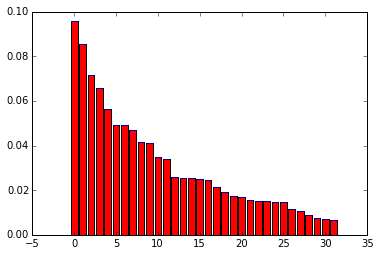

In [31]:
plt.bar(range(x.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")

In [32]:
x = v.fit_transform(D)
names = v.get_feature_names()
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)

[(0.0958, 'G1'), (0.0853, 'Fjob'), (0.0716, 'famsup'), (0.0657, 'age'), (0.0562, 'schoolsup'), (0.0492, 'Pstatus'), (0.049, 'health'), (0.047, 'traveltime'), (0.0418, 'Dalc'), (0.0412, 'higher'), (0.0349, 'nursery'), (0.0341, 'Medu'), (0.0259, 'Walc'), (0.0255, 'activities'), (0.0252, 'guardian'), (0.0248, 'goout'), (0.0244, 'G2'), (0.0212, 'paid'), (0.0193, 'Mjob'), (0.0173, 'freetime'), (0.0171, 'reason'), (0.0155, 'internet'), (0.0152, 'studytime'), (0.0151, 'romantic'), (0.0146, 'sex'), (0.0146, 'address'), (0.0114, 'school'), (0.0106, 'failures'), (0.0089, 'famrel'), (0.0077, 'famsize'), (0.0072, 'absences'), (0.0065, 'Fedu')]
